# Networks (Advanced) Tutorial

In [1]:
import sys
import os
import time
# Add the path to the parent module
sys.path.append(os.path.abspath('../..'))

In [2]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np

from deeppy import LearnFrame, DataGetter, Network, Model



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Data

#### MNIST Classification

In this tutorial we want to show how to create more complex networks. We want to create a CNN network and 2 Linear layers.

Let's classify MNIST dataset

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor
training_data = datasets.MNIST(
    root="datasets",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="datasets",
    train=False,
    download=True,
    transform=ToTensor()
)

X,X_test = training_data.train_data.unsqueeze(1) / 255, test_data.train_data.unsqueeze(1) / 255
y, y_test = training_data.train_labels, test_data.train_labels
batch_size = 128
data = DataGetter(X=X,y=y,X_test = X_test, y_test= y_test, batch_size = batch_size)

data_set_epochs = len(X) / batch_size

/home/boz/anaconda3/envs/deeppy/lib/python3.13/site-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/boz/anaconda3/envs/deeppy/lib/python3.13/site-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


# Model

#### CNN 

Let's create 2 layer CNN network with Relu activation. We want to have 

[1 -> 32]

[32 -> 64]

channels



In [4]:
cnn = {
            "layers":[1,32,64],
            "blocks":[nn.Conv2d, nn.ReLU,],
            "block_args": [{"kernel_size" : 3, "stride":1, "padding"  : 1} , {} ],
            "out_act":nn.ReLU,
            "weight_init":"uniform",
}

#### MaxPool and Dropout after CNN

We also want to add a MaxPool and Dropout layers after the CNN architecture.



In [5]:
pool_drouput = {
    "blocks" : [nn.MaxPool2d, nn.Dropout],
    "block_args" : [{"kernel_size":2}, {"p":0.25}]
}

#### Dense layer bridge

Since after the CNN, we want to use a dense layer we need to flatten our image. You can use nn.Flatten easily, however we want to show you how you can write your own layers

See: https://pytorch.org/docs/stable/notes/extending.html

In [6]:

class Flatten(nn.Module):
    def __init__(self, start_dim: int = 1, end_dim: int = -1) -> None:
        super().__init__()
        self.start_dim = start_dim
        self.end_dim = end_dim

    def forward(self, input):
        return input.flatten(self.start_dim, self.end_dim)

flatten = {
    "blocks" : [Flatten]
}

#### Dense Layer

In [7]:
dense = {
    "layers":[64*14*14, 128, 10],
    "blocks":[nn.Linear, nn.ReLU],
    "block_args":[],
    "out_act":nn.Identity,
    "weight_init":"uniform",
}


#### Network

In [8]:
network_params = [cnn, pool_drouput, flatten, dense]


Scheduler_params = {
    "scheduler" : optim.lr_scheduler.StepLR,
    "gamma":0.1**(1/1000),
    "auto_step":False,
    "step_size" : 1
}
Optimizer_params = {
    "optimizer":optim.AdamW,
    "optimizer_args":{"lr" : 1e-3, "amsgrad" : True},
    "clipper":torch.nn.utils.clip_grad_value_,
    "clipper_params":{"clip_value" : 100},
    "scheduler_params":Scheduler_params,
}

network_params = {
    "arch_params" : network_params,  
    "task" :"reg",
    "optimizer_params" : Optimizer_params
}

net = Network(**network_params)
print(net)
print("----------")
X,y = data.train_data()
print(X.shape)

print(f"out shpae : {net(X).shape}")

Network(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.25, inplace=False)
    (6): Flatten()
    (7): Linear(in_features=12544, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=10, bias=True)
    (10): Identity()
  )
)
----------
torch.Size([128, 1, 28, 28])
out shpae : torch.Size([128, 10])


In [9]:
model_params = {
    "network_params" : network_params,
    "device" : device,
    "criterion" : nn.CrossEntropyLoss(),
    "amp" : False
}


model = Model(**model_params)
#net = Network(**network_params)
#print(net)
#print("----------")
#print(f"out shpae : {net(data.train_data()).shape}")

#model = B_Vae.load("checkpoint/b_vae.pt")

A


# Create LearnFrame

In [10]:
lf = LearnFrame(model, data)

In [11]:
lf.metric.plot_lr = True

Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure
Ensure

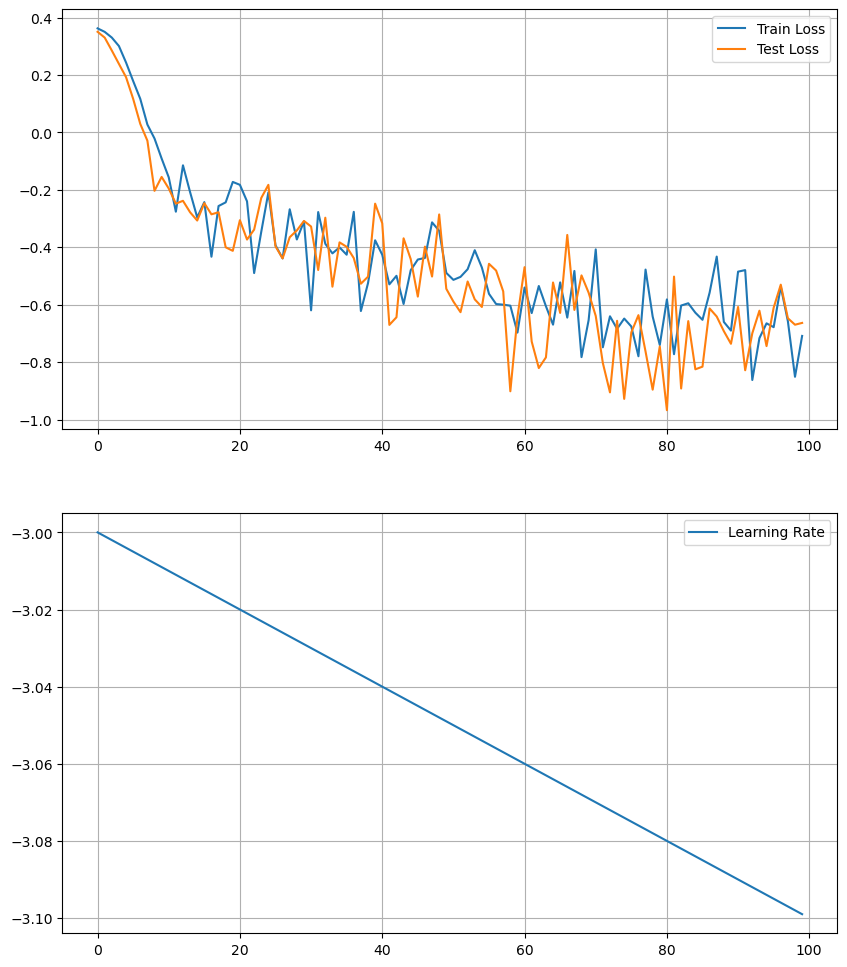

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [12]:
import time
st = time.time()
for i in range(100):
    lf.optimize()
    lf.test()
    
    lf.scheduler_step()
print(time.time()-st)
lf.plot(log=True,show_result= True)

<Figure size 640x480 with 0 Axes>

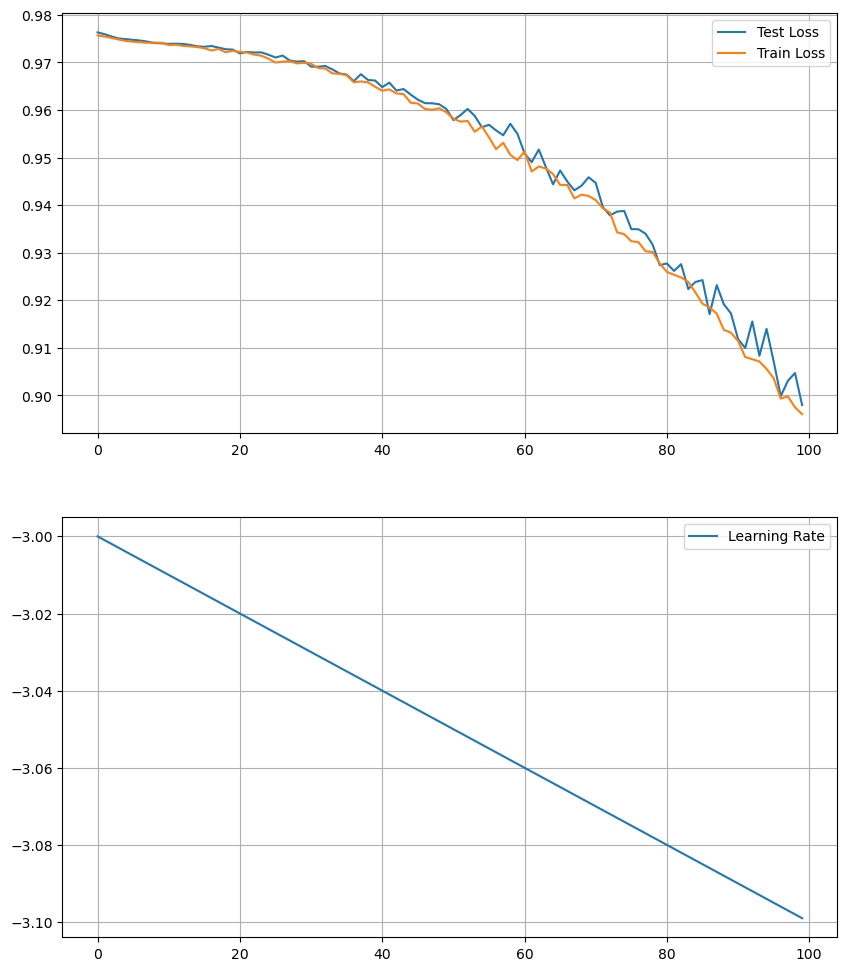

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [13]:
for i in range(100):
    lf.optimize()
    lf.test()
    
    lf.scheduler_step()
        
    if i % 5 ==0:
        lf.plot(log=True,show_result= False)

lf.plot(log=True,show_result= True)

In [19]:
lf.model.forward(im.to(lf.model.device))

tensor([[-0.8570, -2.5542,  3.2212,  ..., -3.4416,  8.9106, -0.0219],
        [ 2.2929, -4.0058,  0.8076,  ..., -5.6214,  2.4338,  0.8613],
        [-1.8808,  0.3769, -1.6984,  ...,  2.7468,  0.1268,  5.2250],
        ...,
        [-1.0202, -5.8129,  5.5125,  ..., 10.1729,  1.3814,  1.8831],
        [-1.5662, -2.2607, -1.6144,  ...,  2.8872, -0.4347,  6.7234],
        [-0.4504,  7.4139,  2.5969,  ..., -2.5709,  1.6278, -2.7186]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [14]:
im, l = data.train_data()

with torch.no_grad():
    pred = nn.functional.softmax(lf.model.forward(im)[0]).argmax().item()

plt.imshow(im[0,0])
plt.title(f"Target : {l[0]} - Prediction : {pred}")
plt.show()



RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [15]:
lf.model

In [16]:
im

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.